## EDA of Indian Movies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Use the detected encoding to read the CSV file
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')


In [3]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Cleaning the Data

In [5]:
df.shape

(15509, 10)

In [6]:
null_rows = df[df.iloc[:,1:9].isna().apply(lambda x:all(x), axis=1)]

In [7]:
null_rows.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4271,Durga Rani Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8669,Main Hoon Kaun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9600,Mughal Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
duplicate = df[df.duplicated(subset = ['Name', 'Year'], keep = False)]

In [9]:
duplicate.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
135,A Ballad of Maladies,(2016),86 min,"Documentary, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN
136,A Ballad of Maladies,(2016),86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN
585,Achanak,(1988),NaN,Thriller,NaN,NaN,Rakesh Kashyap,Om Puri,Kunickaa Sadanand,Kanwaljit Singh
586,Achanak,(1988),NaN,Drama,NaN,NaN,Kavi Raz,Alka,Amarjeet Kaur,Kavi Raz
953,Amrit,(1941),153 min,NaN,NaN,NaN,Master Vinayak,Dada Salvi,Baburao Pendharkar,Lalita Pawar
954,Amrit,(1941),162 min,NaN,NaN,NaN,Master Vinayak,Dada Salvi,Baburao Pendharkar,Lalita Pawar
1249,Arab Ka Sona - Abu Kaalia,(1979),NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN
1250,Arab Ka Sona - Abu Kaalia,(1979),NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN
1768,Balidan,(1992),NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
1769,Balidan,(1992),NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.drop_duplicates(subset=['Name', 'Year'], inplace=True)
df.shape

(15485, 10)

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

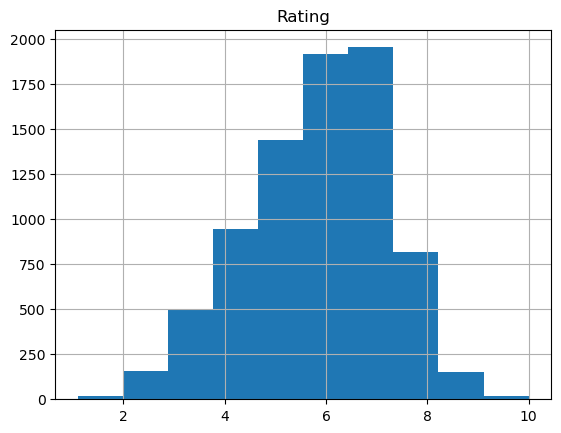

In [11]:
df.hist(column=['Rating'])

In [12]:
df['Rating'].max()

10.0

In [13]:
# Highest rated movie
df.loc[df['Rating']==df['Rating'].max()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [14]:
# lowest rated movie 
df.loc[(df['Rating']==df['Rating'].min()) ]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12171,Sadak 2,(2020),133 min,"Action, Drama",1.1,"67,785",Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


In [15]:
df['Votes']= df['Votes'].fillna(value=0)

In [16]:
df['Votes'].dtypes

dtype('O')

In [17]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [18]:
# Highest voted movie of all time
df.loc[df['Votes']==df['Votes'].max()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12569,Satyam Shivam Sundaram: Love Sublime,(1978),172 min,"Drama, Romance",7.1,999.0,Raj Kapoor,Shashi Kapoor,Zeenat Aman,Kanhaiyalal Chaturvedi


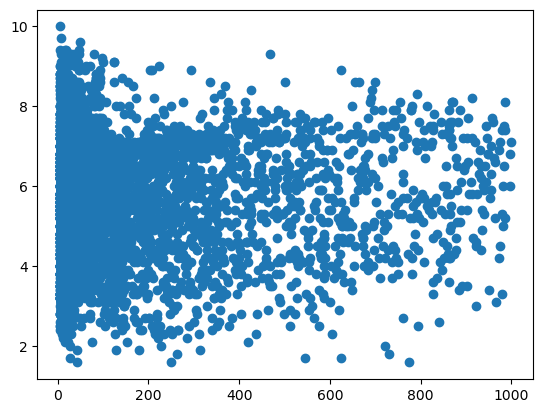

In [19]:
plt.scatter(df["Votes"],df["Rating"])
plt.show()
# This scatter plot describes the rating vs votes plot as there are also some outliers present inside the scatter plot.

In [20]:
list_Genre=[]
list_Genre=df['Genre'].str.split(",")
list_Genre

0                   [Drama]
1                   [Drama]
2         [Drama,  Musical]
3        [Comedy,  Romance]
4                   [Drama]
                ...        
15504              [Action]
15505      [Action,  Drama]
15506              [Action]
15507              [Action]
15508      [Action,  Drama]
Name: Genre, Length: 15485, dtype: object

In [21]:
Genre = []

for x in list_Genre:
    if isinstance(x, list):
        Genre.extend(x)
    elif isinstance(x, (str, float, int)):
        Genre.append(x)
    else:
        print(f"Warning: {x} is not a list and will be skipped")

print(Genre)

['Drama', 'Drama', 'Drama', ' Musical', 'Comedy', ' Romance', 'Drama', 'Comedy', ' Drama', ' Musical', 'Drama', ' Romance', ' War', 'Documentary', 'Horror', ' Mystery', ' Thriller', 'Action', ' Crime', ' Thriller', 'Drama', 'Horror', 'Horror', ' Romance', ' Thriller', 'Comedy', ' Drama', ' Romance', 'Thriller', 'Comedy', ' Drama', nan, 'Comedy', ' Drama', ' Fantasy', 'Comedy', ' Drama', ' Romance', nan, 'Comedy', ' Drama', ' Family', 'Crime', ' Drama', ' Mystery', 'Horror', ' Thriller', 'Biography', 'Documentary', 'Comedy', ' Horror', 'Action', 'Drama', 'Drama', ' Horror', ' Mystery', 'Comedy', 'Drama', nan, 'Drama', 'Action', ' Thriller', 'Action', 'Drama', ' History', 'Drama', 'Drama', ' History', ' Sport', 'Horror', ' Mystery', ' Romance', 'Horror', ' Mystery', 'Drama', ' Horror', ' Romance', 'Horror', ' Mystery', ' Romance', 'Action', ' Drama', ' History', 'Action', ' Drama', ' War', 'Thriller', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Comedy', ' Family', 'Adventure', ' Horror', ' My

In [22]:
Genres = [i.strip() for i in Genre if isinstance(i, str)]

df2=pd.DataFrame(Genres)

df2

,0
0,Drama
1,Drama
2,Drama
3,Musical
4,Comedy
...,...
23039,Drama
23040,Action
23041,Action
23042,Action


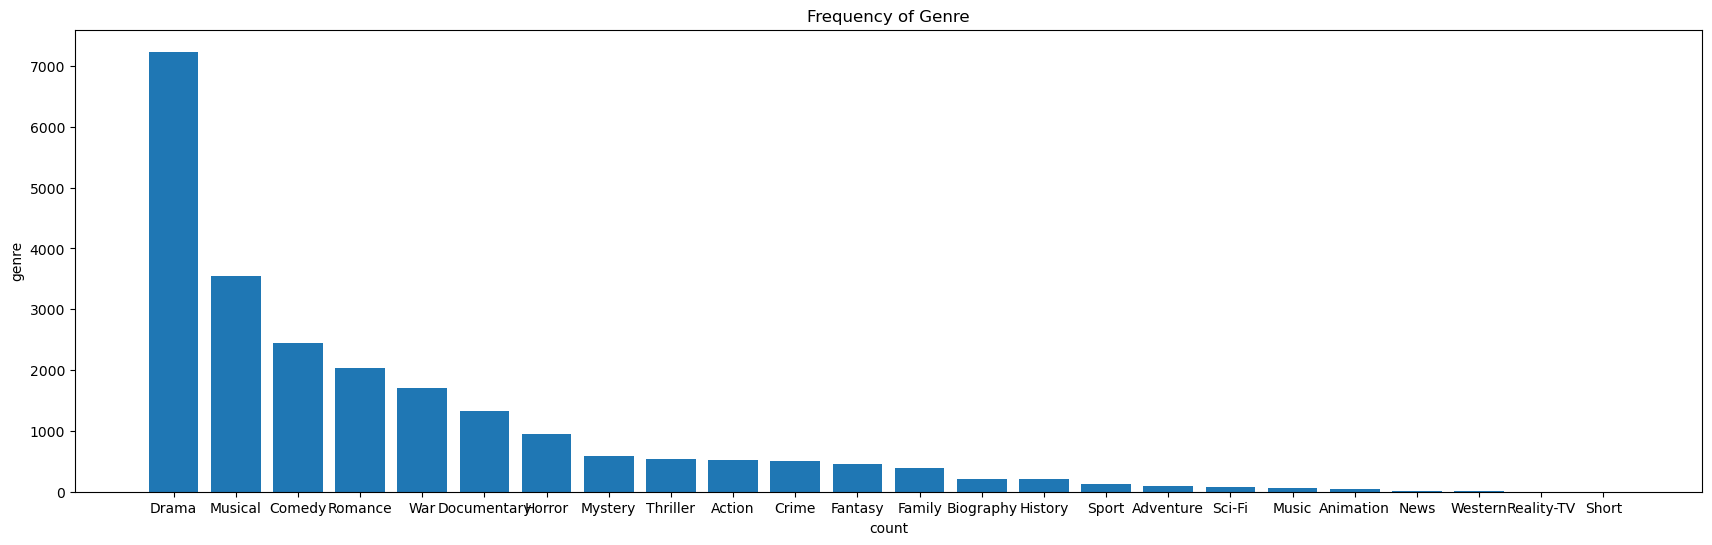

<Figure size 15500x10000 with 0 Axes>

In [23]:
df2.columns=["Genre"]
count_of_genre=df2["Genre"].value_counts()
listOfGenre=df2["Genre"].unique()

plt.figure(figsize=(21,6))
plt.bar(listOfGenre,count_of_genre)
plt.title('Frequency of Genre')
plt.xlabel('count')
plt.xticks(rotation=0)
plt.ylabel('genre')
plt.figure(figsize=(155,100))
plt.show()

In [24]:
def TopTenPlot(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

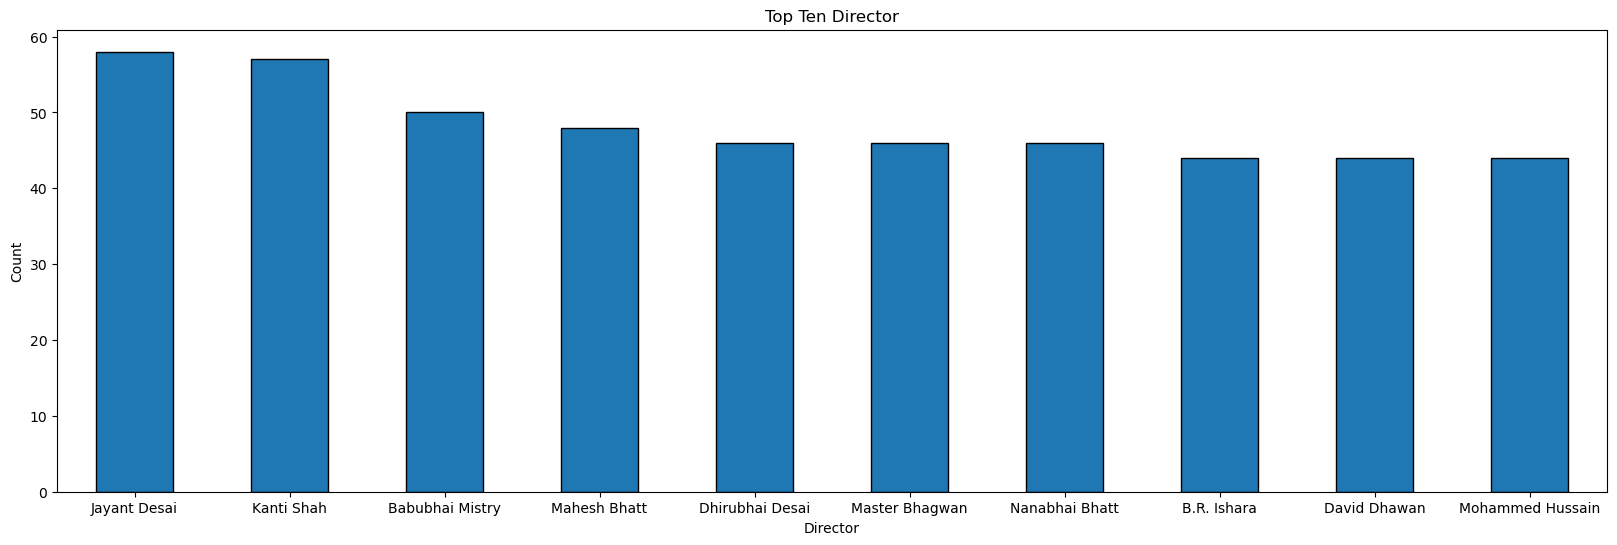

In [25]:
TopTenPlot('Director')

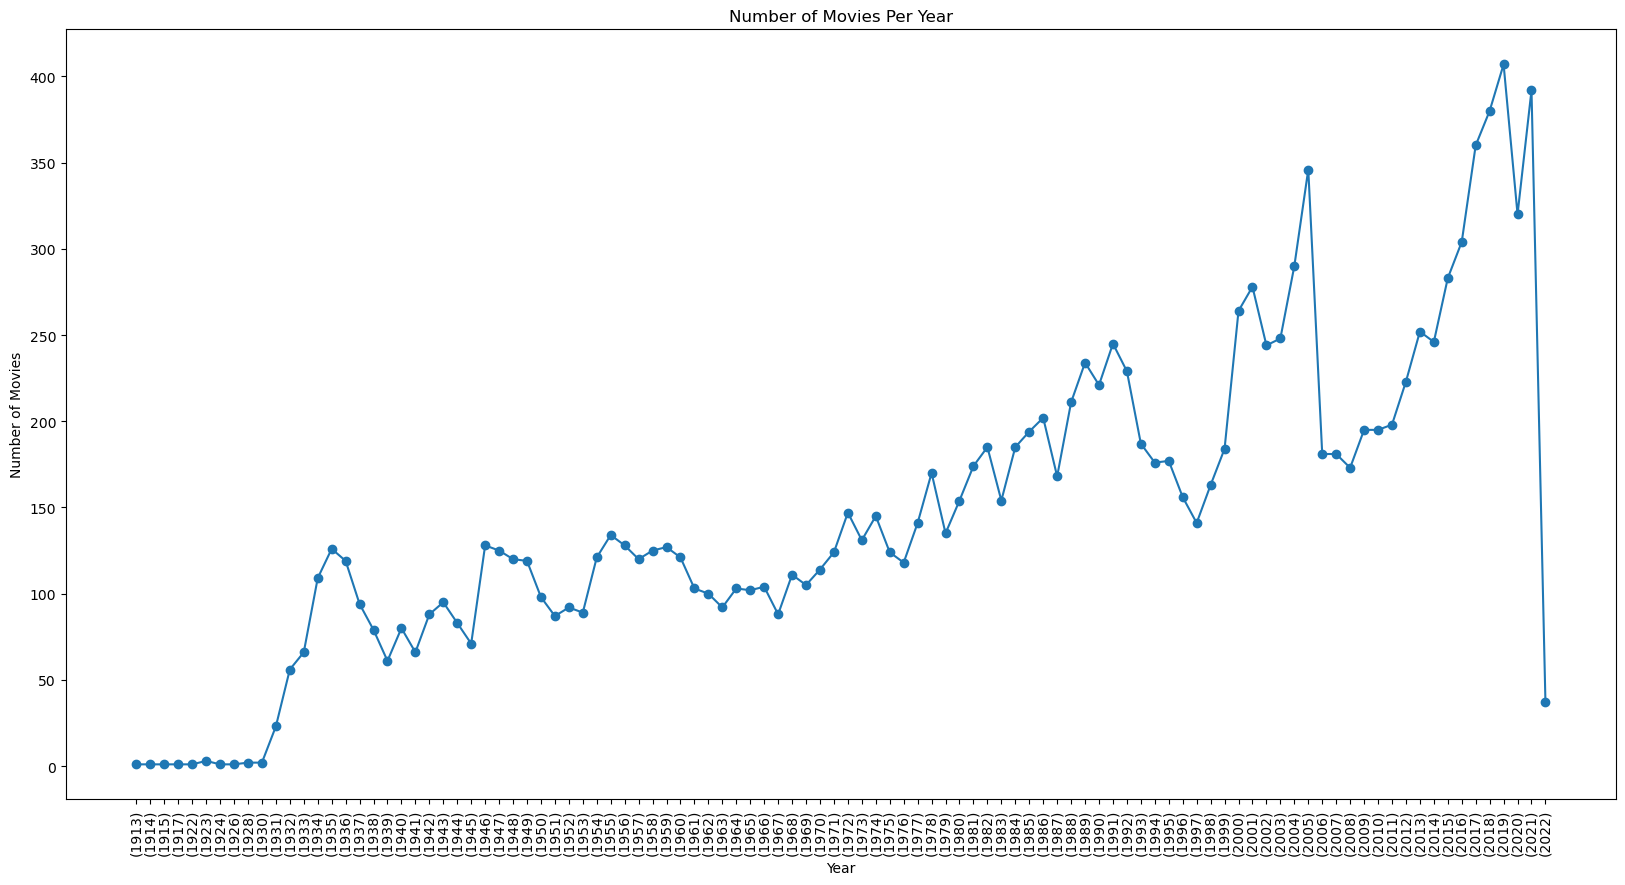

In [26]:
plt.figure(figsize=(20, 10))

year_counts = df['Year'].value_counts().sort_index()
years = year_counts.index

plt.plot(years, year_counts, marker='o' )
plt.xticks(rotation=90)
plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')


plt.show()

## Building Models

In [27]:
df['Genre_mean_rating'] = df.groupby('Genre')['Rating'].transform('mean')
df['Director_encoded'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor_encoded'] = df.groupby('Actor 1')['Rating'].transform('mean')

# Define the features and target variable
features = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']
X = df[features]
y = df['Rating'].fillna(0)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor_encoded
8174,(1967),7.0,NaN,5.761017,6.671429,5.450000
15176,(2018),0.0,NaN,6.352082,NaN,4.450000
13857,NaN,0.0,120 min,5.739906,NaN,NaN
13301,(1992),5.0,NaN,5.468266,4.925000,5.410000
3883,(1992),0.0,NaN,5.524359,4.790000,NaN
...,...,...,...,...,...,...
15058,(2017),83.0,112 min,6.352082,6.028571,5.500000
4001,(1974),0.0,NaN,5.092566,NaN,5.666667
3952,(2020),0.0,60 min,5.600000,5.550000,NaN
336,(1989),21.0,120 min,5.612981,5.000000,5.533333


In [28]:
params = {'n_estimators':[200,300],
          'max_depth':[5,6,7,8],
          'min_samples_split':[2,3,4,5,6],
          'criterion':['squared_error','absolute_error']}

rfr = RandomForestRegressor()
rscv = RandomizedSearchCV(rfr,params,cv=3,scoring='neg_mean_squared_error')
rscv.fit(X_train,y_train)

C:\Users\tusha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tusha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tusha\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tusha\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 377, in fit
    estimator._comput

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [200, 300]},
                   scoring='neg_mean_squared_error')

In [29]:
rscv.best_params_
best_rfr = rscv.best_estimator_
best_rfr

RandomForestRegressor(max_depth=8, n_estimators=200)

In [30]:
X_test.shape

(3097, 6)

In [31]:
for column in X_test.columns:
    X_test[column] = pd.to_numeric(X_test[column], errors='coerce')

In [32]:
predictions = rscv.predict(X_test)

In [34]:
print(y_test.dtype)
print(predictions.dtype)


float64
float64


In [35]:
# Example: converting continuous predictions to categorical by rounding
predictions = np.round(predictions).astype(int)


In [36]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Ensure y_test and predictions are categorical
if np.issubdtype(y_test.dtype, np.number) and not np.array_equal(y_test, y_test.astype(int)):
    y_test = np.round(y_test).astype(int)

if np.issubdtype(predictions.dtype, np.number) and not np.array_equal(predictions, predictions.astype(int)):
    predictions = np.round(predictions).astype(int)

# Validate class consistency
assert set(y_test).issubset(set(predictions)) or set(predictions).issubset(set(y_test))

print(confusion_matrix(y_test, predictions))
print('\n')
# Print classification report
print(classification_report(y_test, predictions))

[[1486    0    0    0    0    0    0    0    0]
 [   0    3    6    2    1    0    0    0    0]
 [   0    0   33   22   16    4    0    0    0]
 [   0    0    6   80  100   22    4    0    0]
 [   0    0    1   36  183   88    9    0    0]
 [   0    0    0    8   80  300   67    0    0]
 [   0    0    0    1   15  115  229   11    0]
 [   0    0    0    0    1   17   62   69    1]
 [   0    0    0    0    0    3    1    3   12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1486
           2       1.00      0.25      0.40        12
           3       0.72      0.44      0.55        75
           4       0.54      0.38      0.44       212
           5       0.46      0.58      0.51       317
           6       0.55      0.66      0.60       455
           7       0.62      0.62      0.62       371
           8       0.83      0.46      0.59       150
           9       0.92      0.63      0.75        19

    accuracy           